In [1]:
## The code below will allow optimization of hyperparameter
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

Populating the interactive namespace from numpy and matplotlib


Training epoch 0 of 5000 complete
Training epoch 1000 of 5000 complete
Training epoch 2000 of 5000 complete
Training epoch 3000 of 5000 complete
Training epoch 4000 of 5000 complete


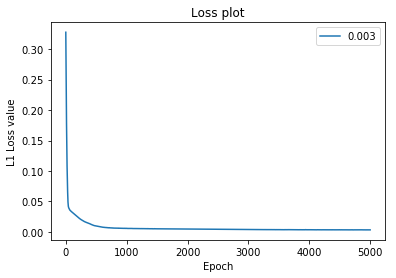

In [2]:
# To plot neural network error against learning rate for optimization

from Chempy.neural import create_network,calculate_errors

# Now create and train the neural network for optimal hyperparameters
learning_rate = 0.003
epoch, loss = create_network(learning_rate=learning_rate)
error,std,max_err = calculate_errors('test')

In [3]:
mean_err = np.mean(error)
std_err = np.std(error)
mean_max_err = np.mean(max_err)
print('Mean error is %.5f +/- %.5f with mean maximum %.5f' %(mean_err,std_err,mean_max_err))

Mean error is 0.00678 +/- 0.00725 with mean maximum 0.02319


In [4]:
max_err

array([ 0.0146192 ,  0.01037366,  0.02203519, ...,  0.04298821,
        0.02538023,  0.00647454])

In [5]:
np.max(max_err)

0.2952390471242452

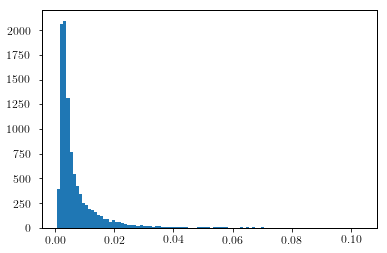

In [8]:
dat=plt.hist(error,bins=100)

In [7]:
from Chempy.neural import max_err_corner_plot
max_err_corner_plot('test')

KeyboardInterrupt: 

In [ ]:
plt.plot(epoch,loss)

In [ ]:
sol_dat = np.load('Chempy/input/stars/Proto-sun.npy')
sol_dat = array([ ( 0.  ,  4.56),
       ( 0.06,  0.01)], 
      dtype=[('He', '<f8'),  ('age', '<f8')])

In [ ]:
sol_dat

In [ ]:
np.save('Chempy/input/stars/Proto-sun.npy',sol_dat)

In [ ]:
sol_dat.dtype.names

In [ ]:
from Chempy.wrapper import multi_star_optimization
multi_star_optimization()

In [ ]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10_neural/')
